In [ ]:
import pandas as pd
import numpy as np
import missingno as msno
import matplotlib.pyplot as plt
# from sklearn.experimental import enable_iterative_imputer
# from sklearn.impute import MissingIndicator, KNNImputer,SimpleImputer
# from sklearn.impute import IterativeImputer
import seaborn as sns

In [ ]:
df = pd.read_excel('/content/sample_data/dataset.xlsx')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5644 entries, 0 to 5643
Columns: 111 entries, Patient ID to ctO2 (arterial blood gas analysis)
dtypes: float64(70), int64(4), object(37)
memory usage: 4.8+ MB


In [ ]:
df.shape
#cpnnaitre le nbre de ligne de colonne

(5644, 111)

<Axes: >

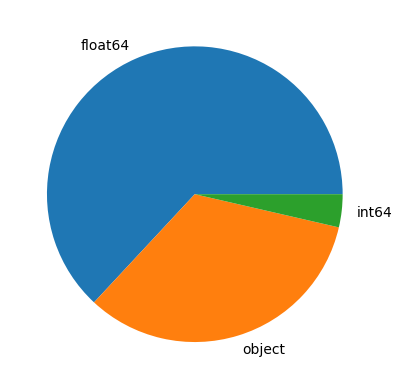

In [ ]:
#quand on a un grand dataset ont veut connaitre le type de variable utilisé dans un data set
#variable quntitative et variable qualitative
df.dtypes.value_counts().plot.pie()

In [ ]:
data = df

In [ ]:
data.head(10)

Patient ID  Patient age quantile SARS-Cov-2 exam result  \
0  44477f75e8169d2                    13               negative   
1  126e9dd13932f68                    17               negative   
2  a46b4402a0e5696                     8               negative   
3  f7d619a94f97c45                     5               negative   
4  d9e41465789c2b5                    15               negative   
5  75f16746216c4d1                     9               negative   
6  2a2245e360808d7                    13               negative   
7  509197ec73f1400                    16               negative   
8  8bb9d64f0215244                     1               negative   
9  5f1ed301375586c                    17               negative   

   Patient addmited to regular ward (1=yes, 0=no)  \
0                                               0   
1                                               0   
2                                               0   
3                                               0   
4                                               0   
5                                               0   
6                                               0   
7                                               0   
8                                               0   
9                                               0   

   Patient addmited to semi-intensive unit (1=yes, 0=no)  \
0                                                  0       
1                                                  0       
2                                                  0       
3                                                  0       
4                                                  0       
5                                                  0       
6                                                  0       
7                                                  0       
8                                                  1       
9                                                  0       

   Patient addmited to intensive care unit (1=yes, 0=no)  Hematocrit  \
0                                                  0             NaN   
1                                                  0        0.236515   
2                                                  0             NaN   
3                                                  0             NaN   
4                                                  0             NaN   
5                                                  0             NaN   
6                                                  0             NaN   
7                                                  0             NaN   
8                                                  0       -1.571682   
9                                                  0             NaN   

   Hemoglobin  Platelets  Mean platelet volume   ...  \
0         NaN        NaN                    NaN  ...   
1   -0.022340  -0.517413               0.010677  ...   
2         NaN        NaN                    NaN  ...   
3         NaN        NaN                    NaN  ...   
4         NaN        NaN                    NaN  ...   
5         NaN        NaN                    NaN  ...   
6         NaN        NaN                    NaN  ...   
7         NaN        NaN                    NaN  ...   
8   -0.774212   1.429667              -1.672222  ...   
9         NaN        NaN                    NaN  ...   

   Hb saturation (arterial blood gases)  pCO2 (arterial blood gas analysis)  \
0                                   NaN                                 NaN   
1                                   NaN                                 NaN   
2                                   NaN                                 NaN   
3                                   NaN                                 NaN   
4                                   NaN                                 NaN   
5                                   NaN                                 NaN   
6                                   NaN                       

In [ ]:
#afficher toutes les colonnes (quand il y'en a plusieurs)
pd.set_option('display.max_row', 111)
pd.set_option('display.max_column', 5644)

In [ ]:
msno.bar(df)
plt.show()

In [ ]:
missing_value= df.isnull().sum()
missing_per = (missing_value/len(df))*100
missing_table = pd.DataFrame({'Missing value': missing_value, 'Percentage': missing_per})
print(missing_table)

                                                    Missing value  Percentage
Patient ID                                                      0    0.000000
Patient age quantile                                            0    0.000000
SARS-Cov-2 exam result                                          0    0.000000
Patient addmited to regular ward (1=yes, 0=no)                  0    0.000000
Patient addmited to semi-intensive unit (1=yes,...              0    0.000000
Patient addmited to intensive care unit (1=yes,...              0    0.000000
Hematocrit                                                   5041   89.316088
Hemoglobin                                                   5041   89.316088
Platelets                                                    5042   89.333806
Mean platelet volume                                         5045   89.386960
Red blood Cells                                              5042   89.333806
Lymphocytes                                                  504

<Axes: >

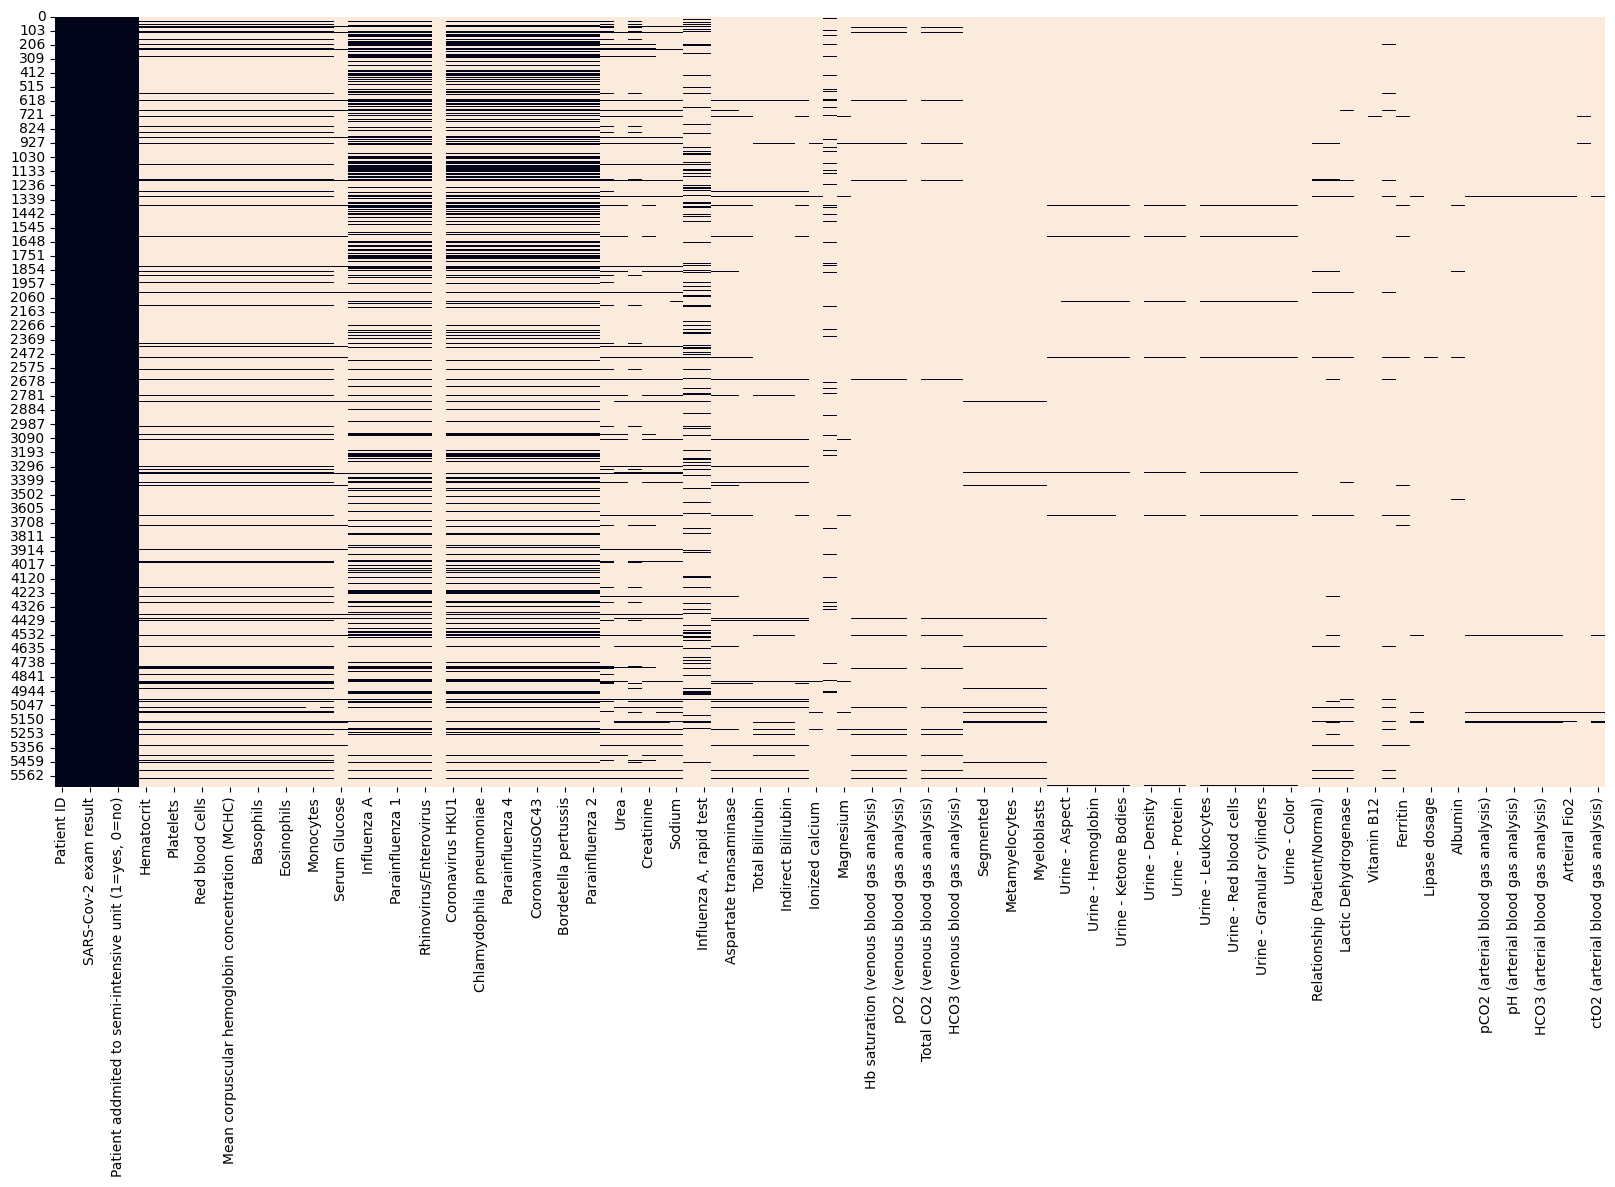

In [ ]:
plt.figure(figsize=(20,10))
sns.heatmap(df.isna(), cbar=False)
#des lignes veulent dire deux choses : on peut illiminer potemyiellement des valeurs avec dropmap,certaines lignes signifient qu'il y a rapport entre les deux variables

In [ ]:
# pourcentage des valeurs manqunates par odre croissant
(df.isna().sum()/df.shape[0]).sort_values(ascending=True)

Patient ID                                               0.000000
Patient age quantile                                     0.000000
SARS-Cov-2 exam result                                   0.000000
Patient addmited to regular ward (1=yes, 0=no)           0.000000
Patient addmited to semi-intensive unit (1=yes, 0=no)    0.000000
Patient addmited to intensive care unit (1=yes, 0=no)    0.000000
Influenza B                                              0.760099
Respiratory Syncytial Virus                              0.760099
Influenza A                                              0.760099
Rhinovirus/Enterovirus                                   0.760454
Inf A H1N1 2009                                          0.760454
CoronavirusOC43                                          0.760454
Coronavirus229E                                          0.760454
Parainfluenza 4                                          0.760454
Adenovirus                                               0.760454
Chlamydoph

In [ ]:
# élimnation des colonnes avec plus de 90% des valeurs manquantes
#identifications des colonnes yant 90 % des valeurs manquantes df.columns[df.isna().sum()/df.shape[0] < 0.9]
df = df[df.columns[df.isna().sum()/df.shape[0] < 0.9]]

In [ ]:
df.shape

(5644, 39)

In [ ]:
msno.bar(df)
plt.show()

In [ ]:
#colonne patient à supprimer ou pas? df = df.drop('Patient ID', axis=1)

In [ ]:
#Visualisation des targets

In [ ]:
df['SARS-Cov-2 exam result'].value_counts(normalize=True)
#pour voir le count en terme de pourcentage


negative    0.901134
positive    0.098866
Name: SARS-Cov-2 exam result, dtype: float64

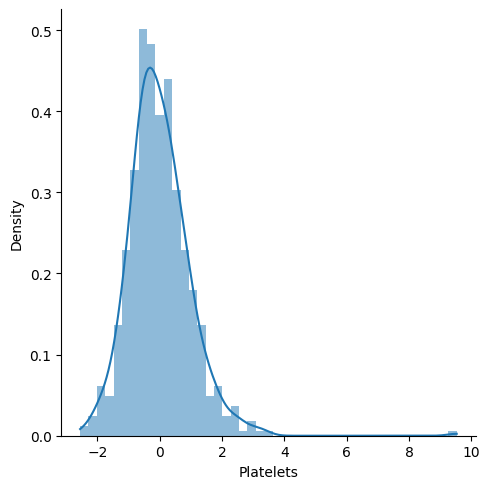

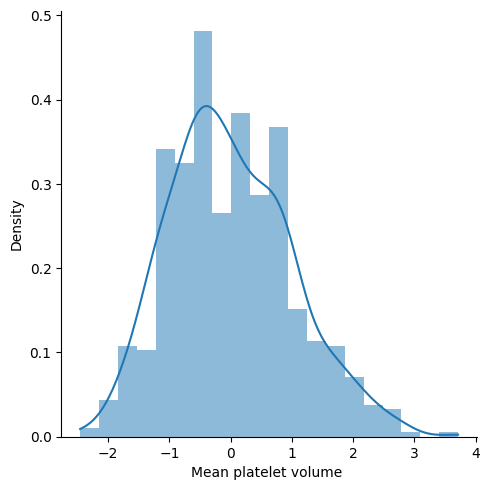

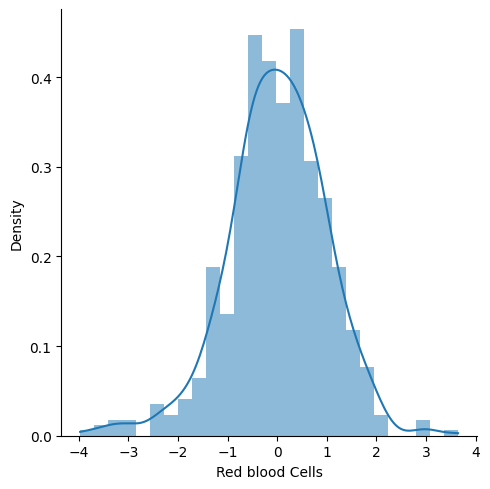

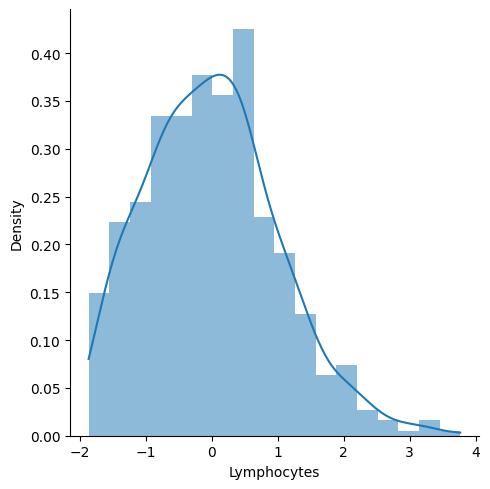

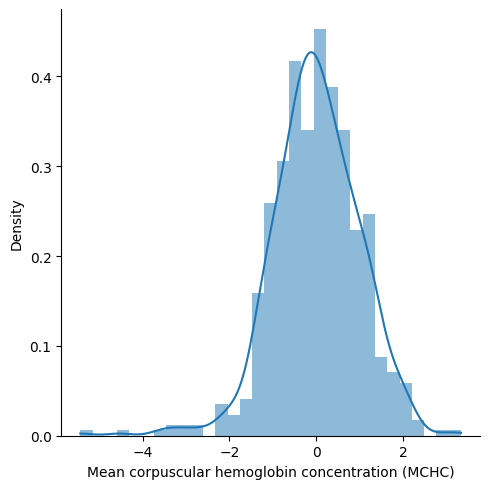

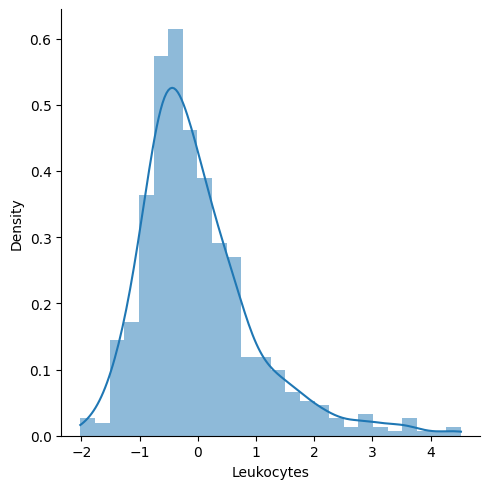

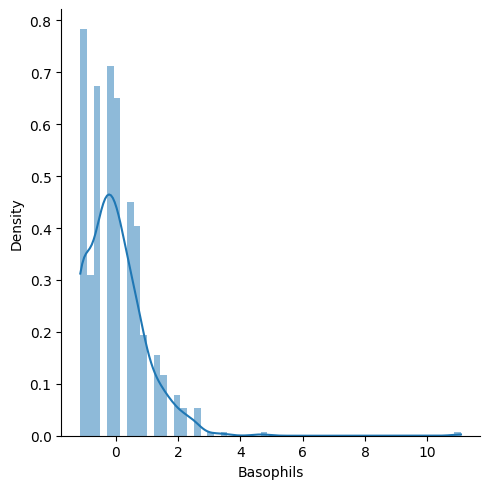

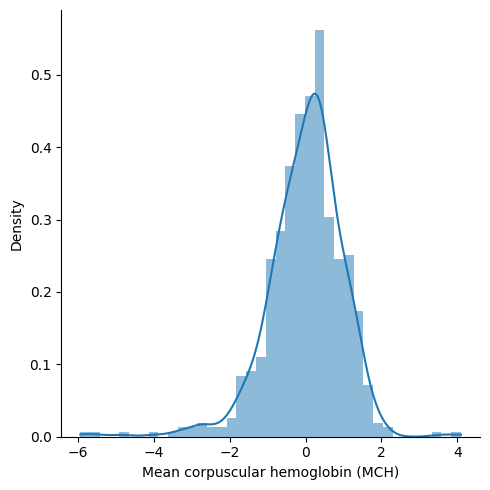

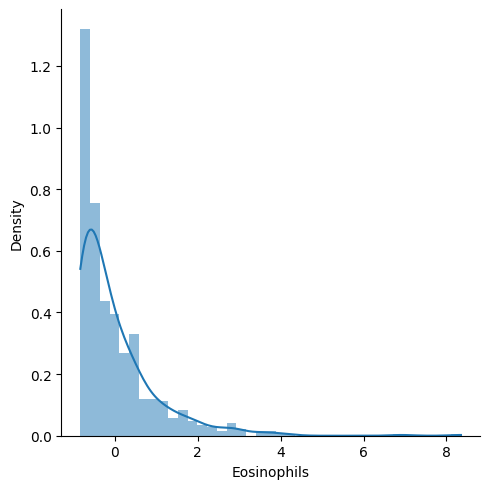

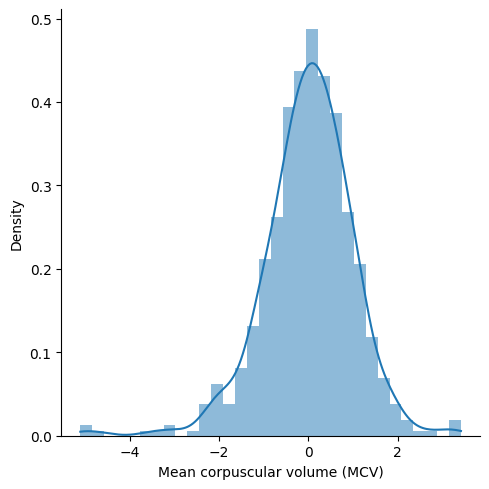

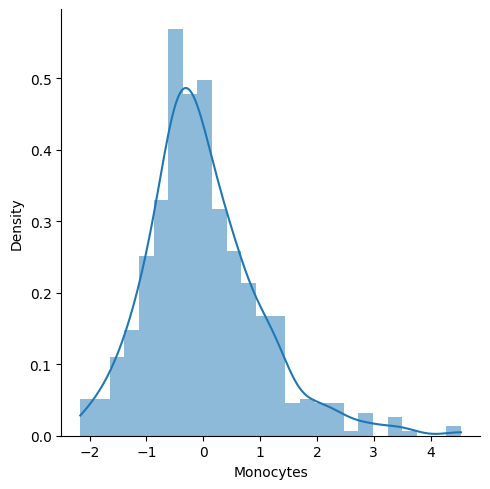

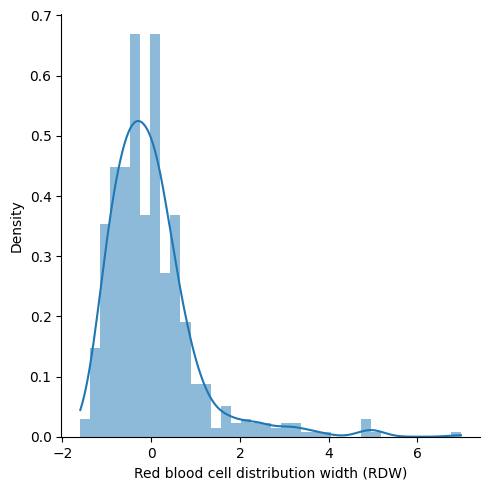

In [ ]:
#histogrammes des variables continues
#parcourir le  dataset et selectionner les colonnes qui ont des floats
#for col in df.select_dtypes('float'): print(col)
for col in df.select_dtypes('float'):
  sns.displot(df[col],kde=True, stat="density", linewidth=0)

array([13, 17,  8,  5, 15,  9, 16,  1, 14, 11,  0,  3, 10,  6, 12, 19,  7,
       18,  2,  4])

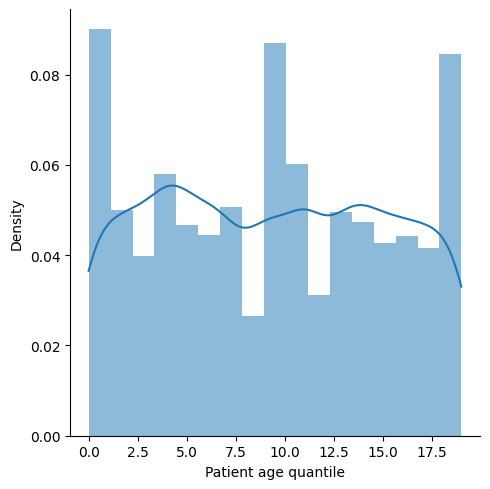

In [ ]:
sns.displot(df['Patient age quantile'],kde=True, stat="density", linewidth=0)
df['Patient age quantile'].unique()

In [ ]:
df1 = df.drop('Patient ID', axis=1)

In [ ]:
#petite astuce
for cat in df1.select_dtypes('object'):
    print(f'{cat :-<50} {df1[cat].unique()}')

SARS-Cov-2 exam result---------------------------- ['negative' 'positive']
Respiratory Syncytial Virus----------------------- [nan 'not_detected' 'detected']
Influenza A--------------------------------------- [nan 'not_detected' 'detected']
Influenza B--------------------------------------- [nan 'not_detected' 'detected']
Parainfluenza 1----------------------------------- [nan 'not_detected' 'detected']
CoronavirusNL63----------------------------------- [nan 'not_detected' 'detected']
Rhinovirus/Enterovirus---------------------------- [nan 'detected' 'not_detected']
Coronavirus HKU1---------------------------------- [nan 'not_detected' 'detected']
Parainfluenza 3----------------------------------- [nan 'not_detected' 'detected']
Chlamydophila pneumoniae-------------------------- [nan 'not_detected' 'detected']
Adenovirus---------------------------------------- [nan 'not_detected' 'detected']
Parainfluenza 4----------------------------------- [nan 'not_detected' 'detected']
Coronavirus2

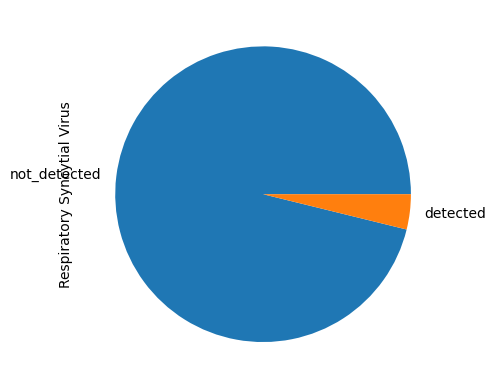

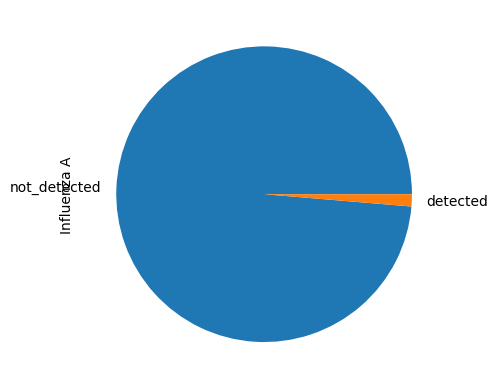

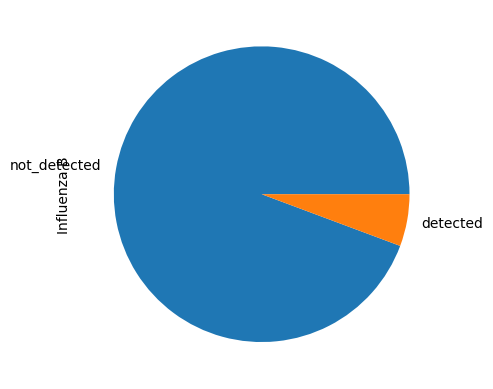

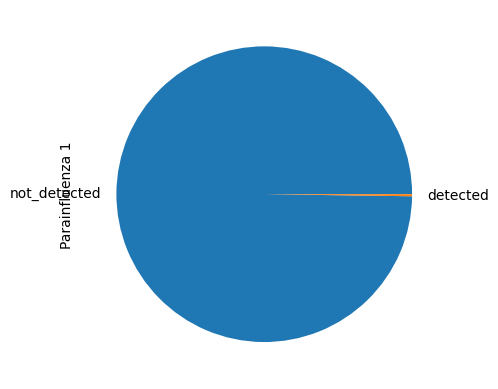

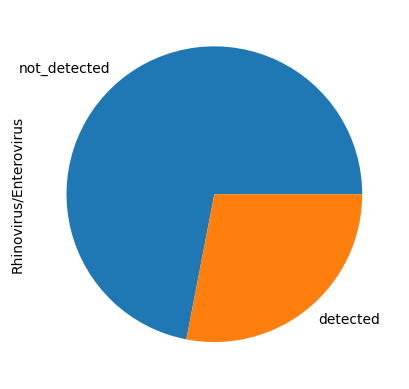

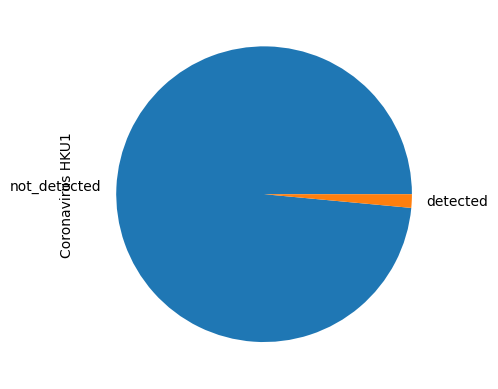

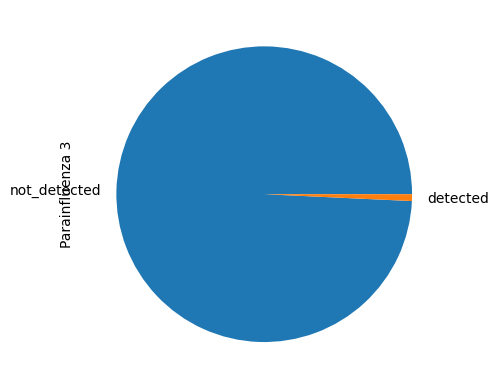

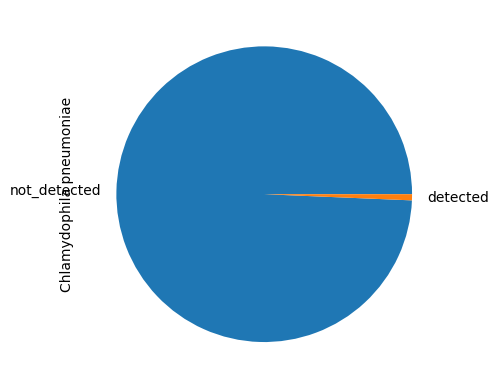

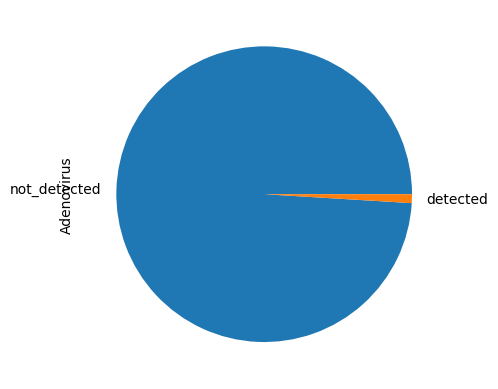

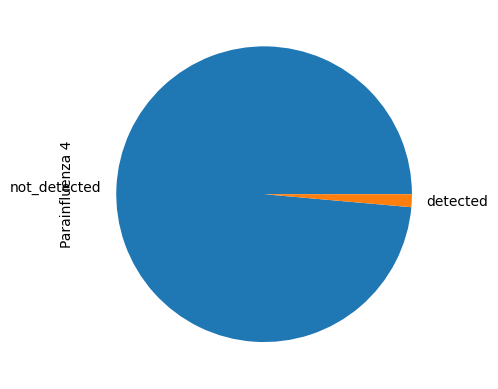

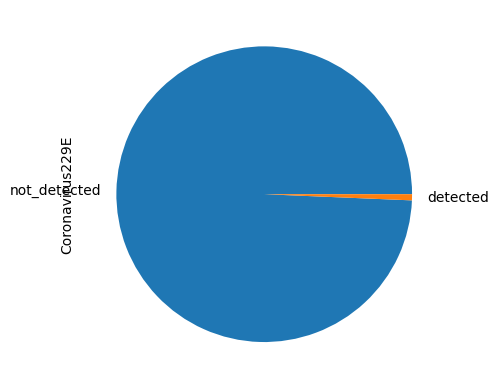

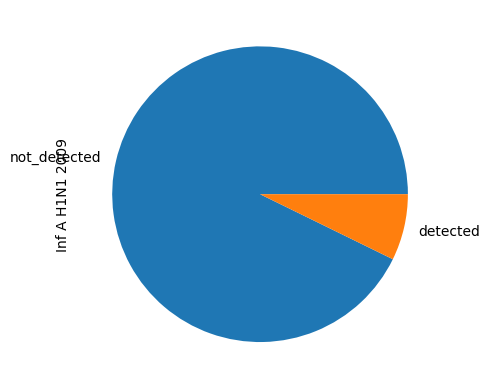

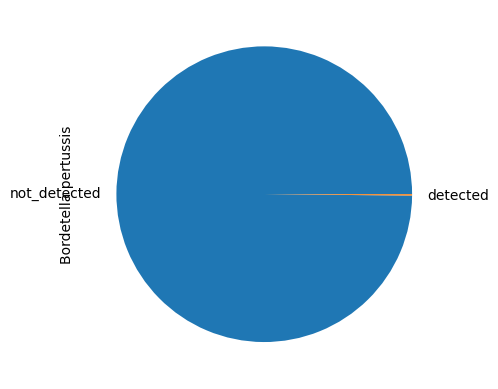

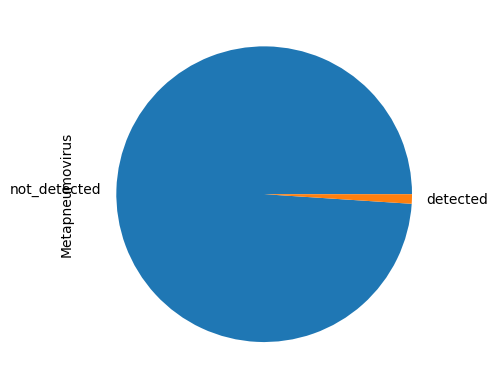

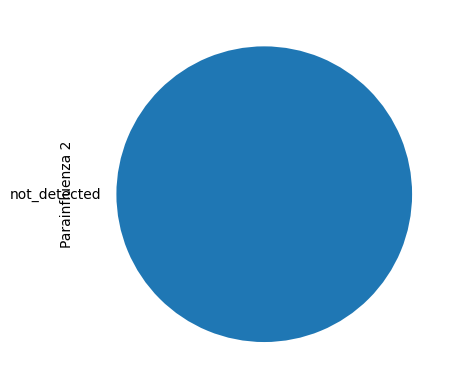

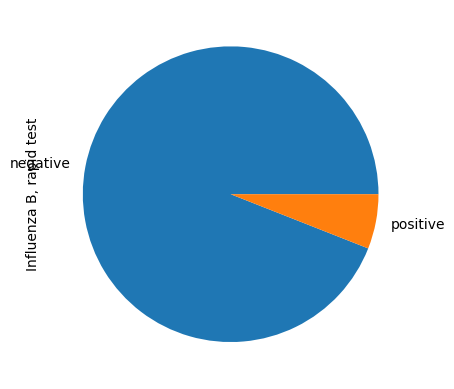

In [ ]:
#Variable quantitative ou quategorielles
#connaitre les nombres des valeurs qu'il y a, compter les nombres de variables
for cat in df1.select_dtypes('object'):
    plt.figure()
    df1[cat].value_counts().plot.pie()

In [ ]:
#visualiser la relation entre variable et la target
positive_df= df[df['SARS-Cov-2 exam result'] == 'positive']
negative_df= df[df['SARS-Cov-2 exam result'] == 'negative']

In [ ]:
#Creation des sous ensembles blood et viral

In [ ]:
missing_rate = df.isna().sum()/df.shape[0]
blood_columns = df.columns[(missing_rate < 0.9) & (missing_rate >0.88)]
viral_columns = df.columns[(missing_rate < 0.88) & (missing_rate > 0.75)]

<ipython-input-34-9bef8a3605d4>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(positive_df[col], label='positive',color='blue')
<ipython-input-34-9bef8a3605d4>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(negative_df[col], label='negative',color='yellow')
<ipython-input-34-9bef8a3605d4>:3:

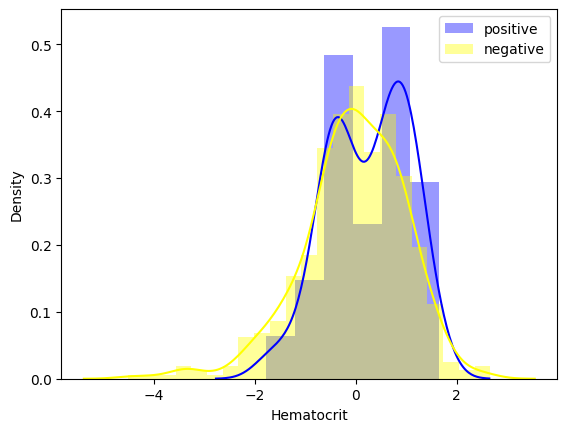

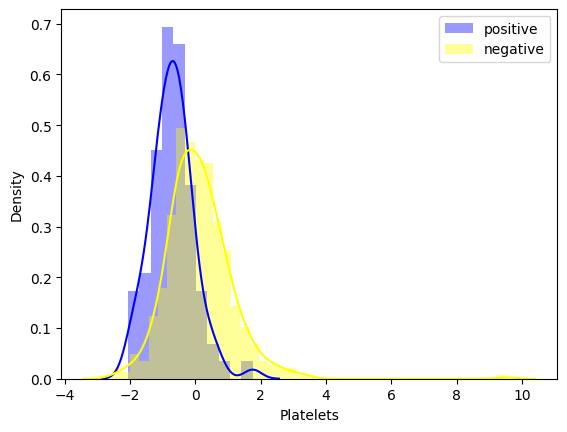

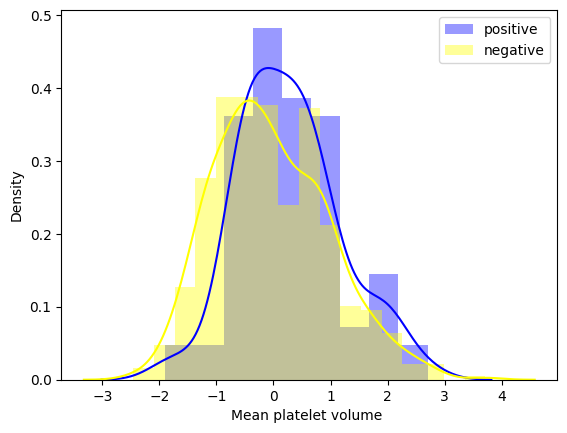

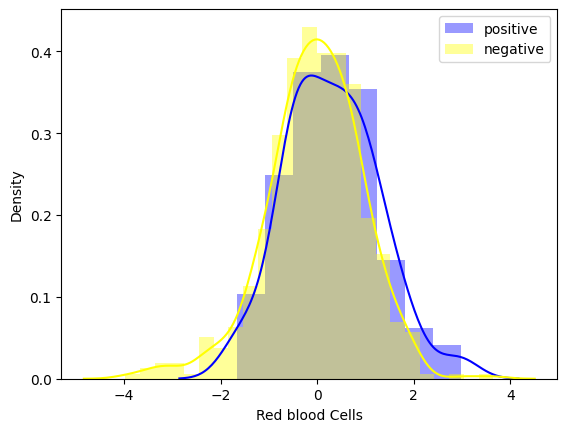

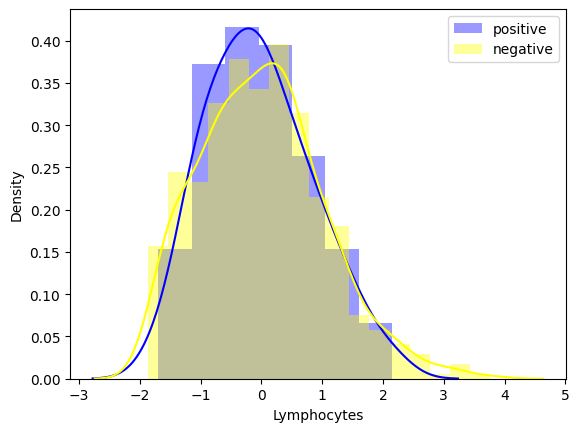

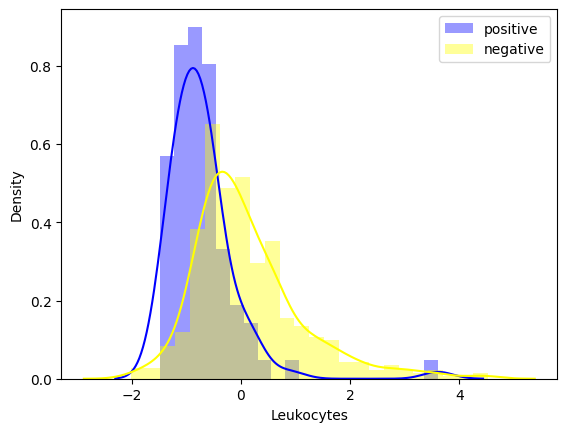

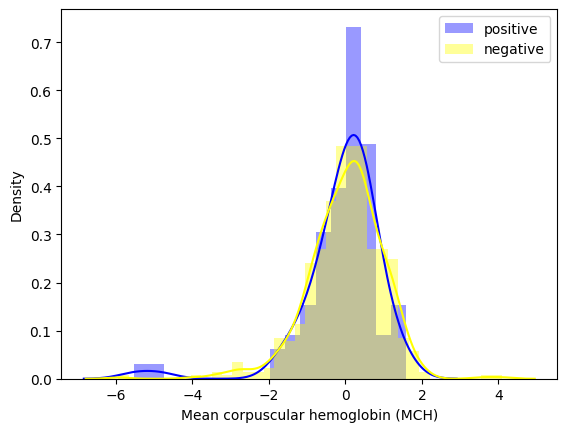

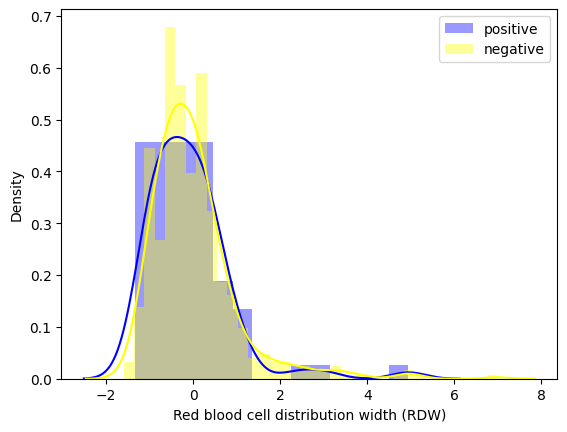

In [ ]:
for col in blood_columns:
    plt.figure()
    sns.distplot(positive_df[col], label='positive',color='blue')
    sns.distplot(negative_df[col], label='negative',color='yellow')
    plt.legend()

In [ ]:
blood_columns

Index(['Hematocrit', 'Hemoglobin', 'Platelets', 'Mean platelet volume ',
       'Red blood Cells', 'Lymphocytes',
       'Mean corpuscular hemoglobin concentration (MCHC)', 'Leukocytes',
       'Basophils', 'Mean corpuscular hemoglobin (MCH)', 'Eosinophils',
       'Mean corpuscular volume (MCV)', 'Monocytes',
       'Red blood cell distribution width (RDW)'],
      dtype='object')

###hypotheses nulle (H0):
Les individus atteints du covid-19 ont des taux de Leukocytes, Monocytes, Platelets significativement différents

H0 = Les taux moyens sont ÉGAUX chez les individus positifs et négatifs
Les individus atteints d'une quelconque maladie ont des taux significativement différents

<Axes: xlabel='Patient age quantile', ylabel='count'>

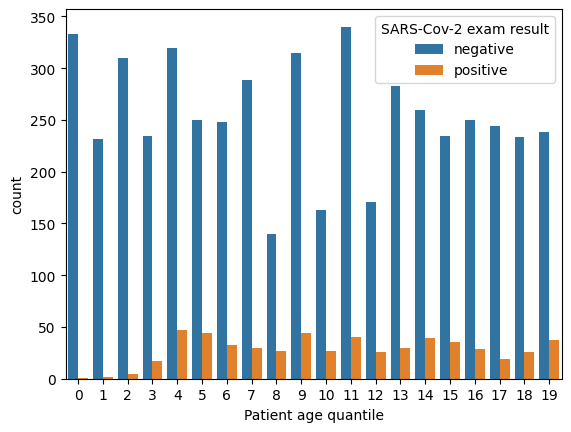

In [ ]:
#Relation entre target /age
sns.countplot(x='Patient age quantile', hue='SARS-Cov-2 exam result',data=df)

###Relation entre les target/Viral


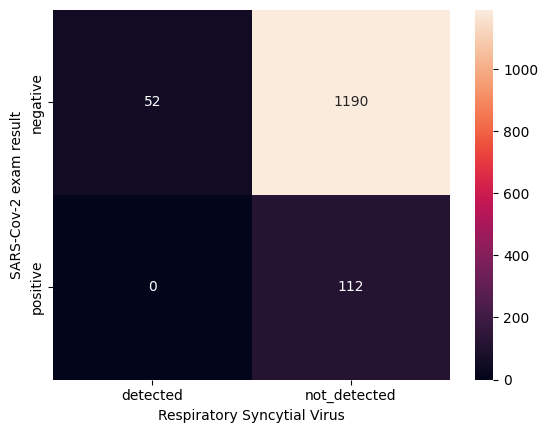

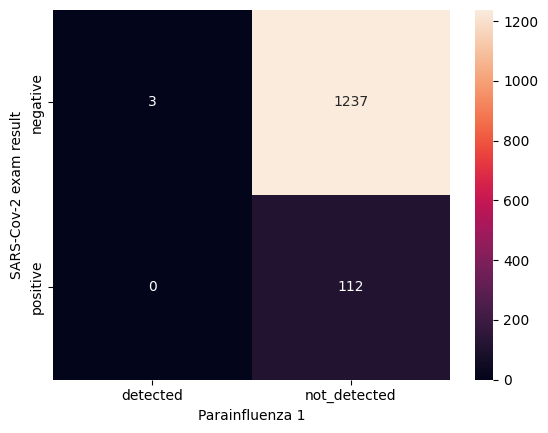

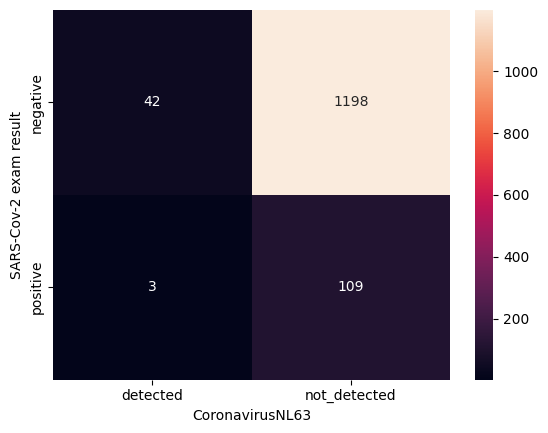

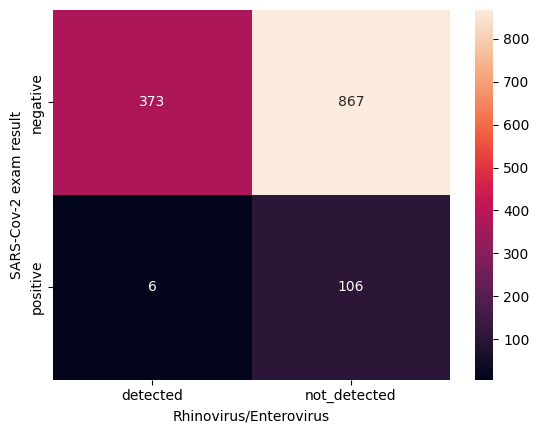

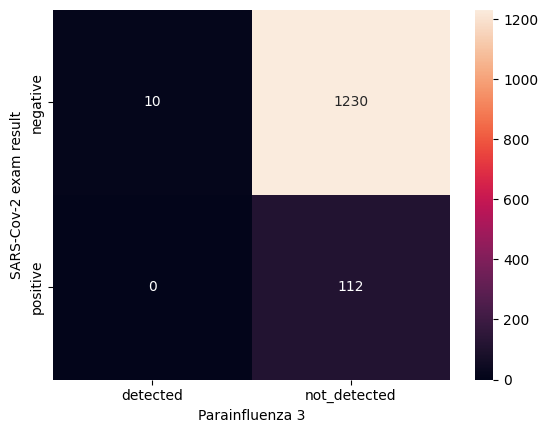

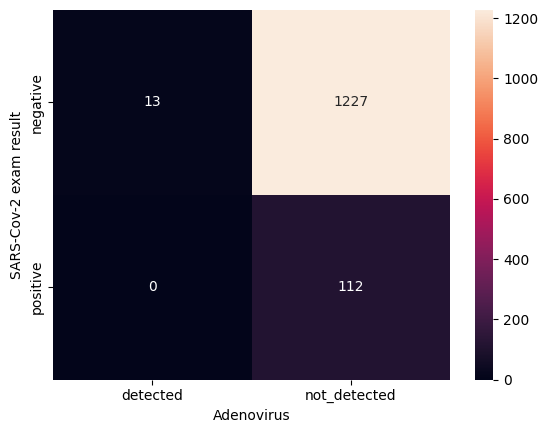

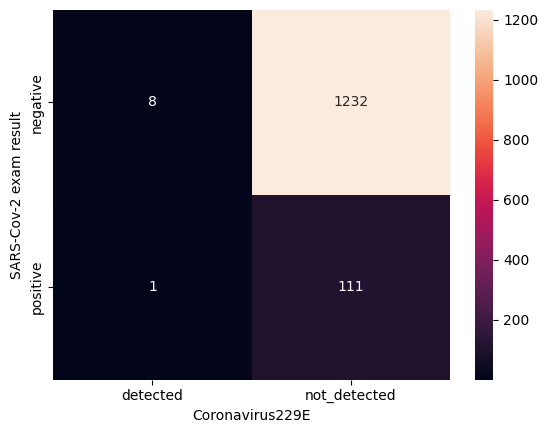

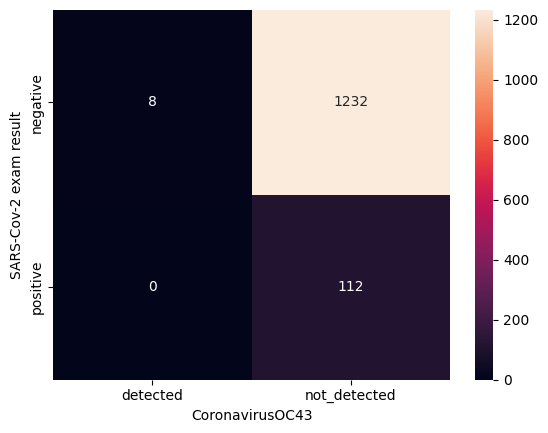

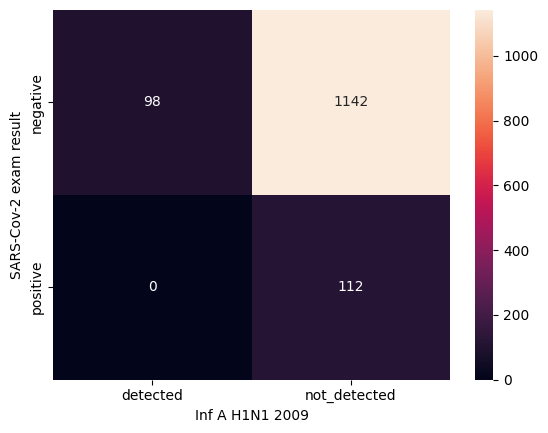

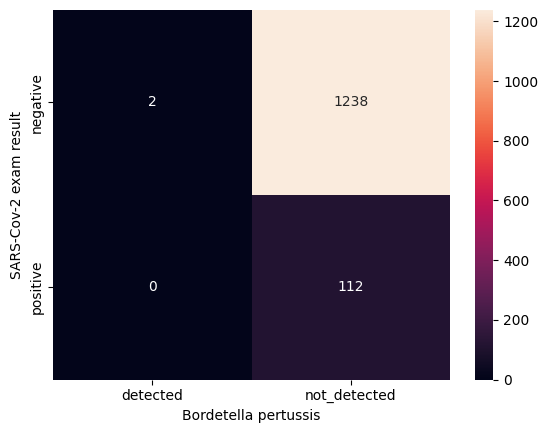

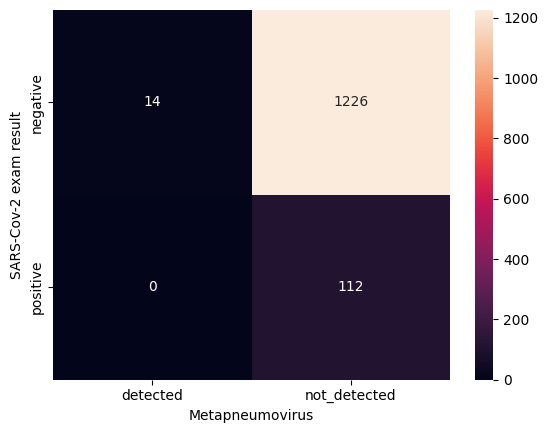

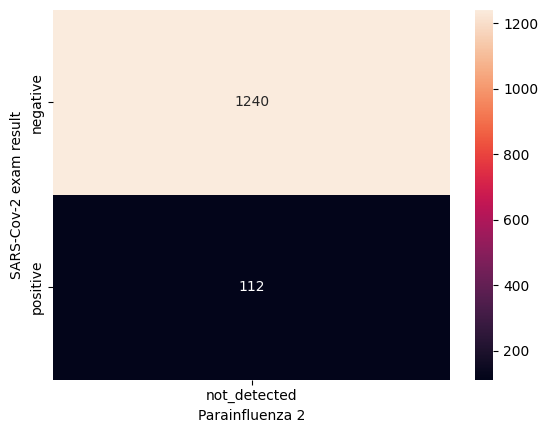

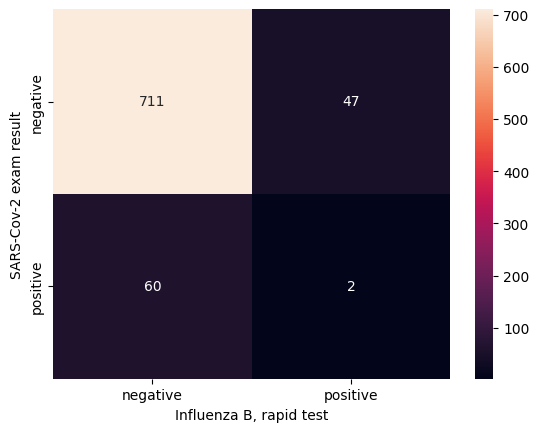

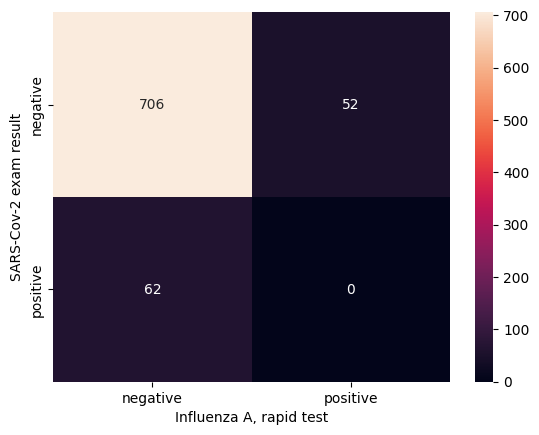

In [ ]:
#annot=True : Mettre les annotations
#fmt='d': afficher les nombres en entier
for col in viral_columns:
    plt.figure()
    sns.heatmap(pd.crosstab(df['SARS-Cov-2 exam result'], df[col]), annot=True, fmt='d')

##Analyse un peu plus Avancée
#Relation Variables / Variables
#relations Taux Sanguin

<Axes: >

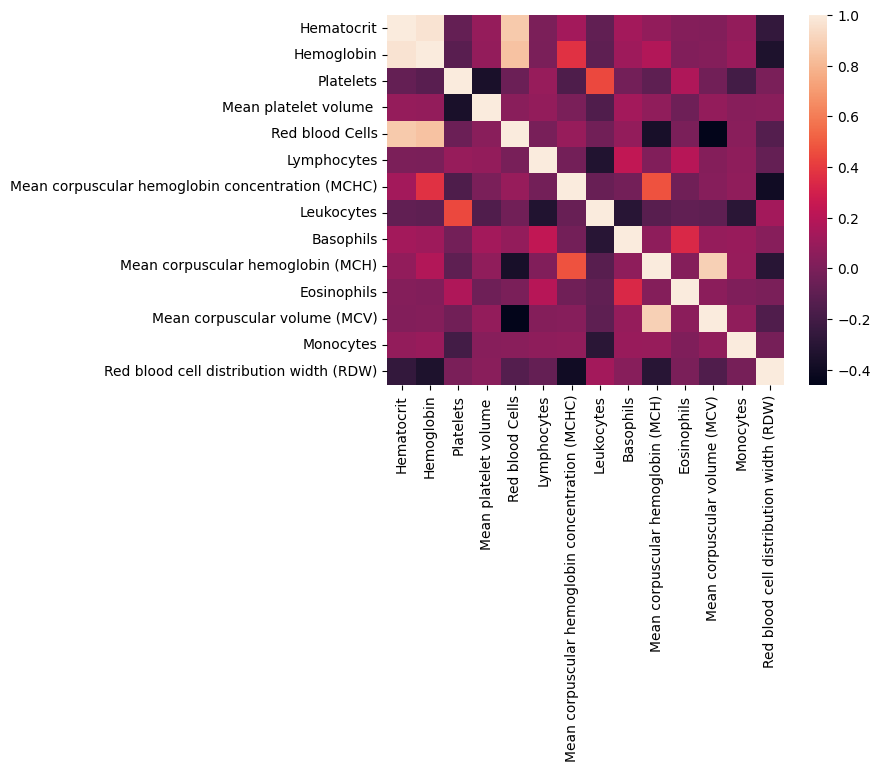

In [ ]:
#la matrice de correlation est proche de 1 plus les deux variables evoluent
#plus une correlation est proche de 1, plus les deux variables evoluents  positivement l'une de l'autre.
#plus l'une evolue, l'autre evolue également
sns.heatmap(df[blood_columns].corr())

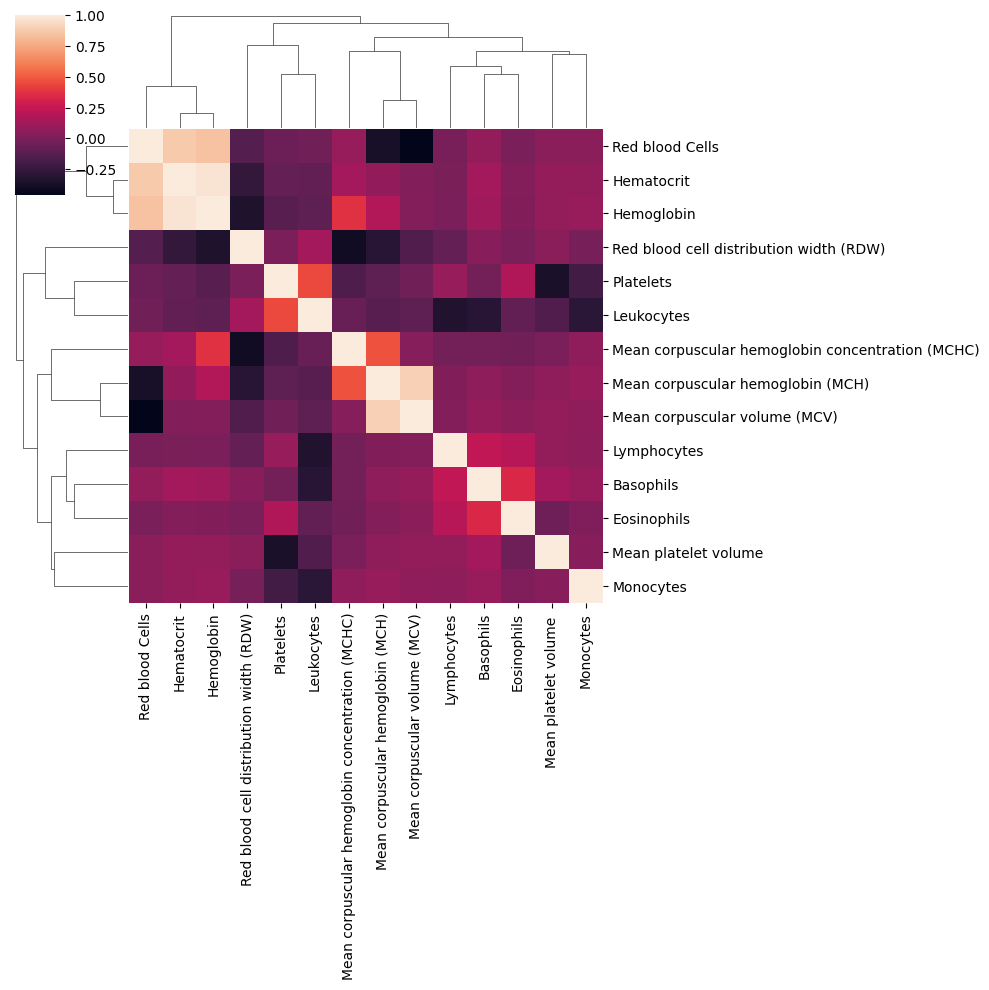

In [ ]:
#tres important d'avoir ce graphique,c'est une information utile pour prendre des décisions surtout pour la modélisation
sns.clustermap(df[blood_columns].corr())

### Relation entre le Sang et l'age de l'individu

<ipython-input-68-59fc838854ff>:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure()


<Figure size 640x480 with 0 Axes>

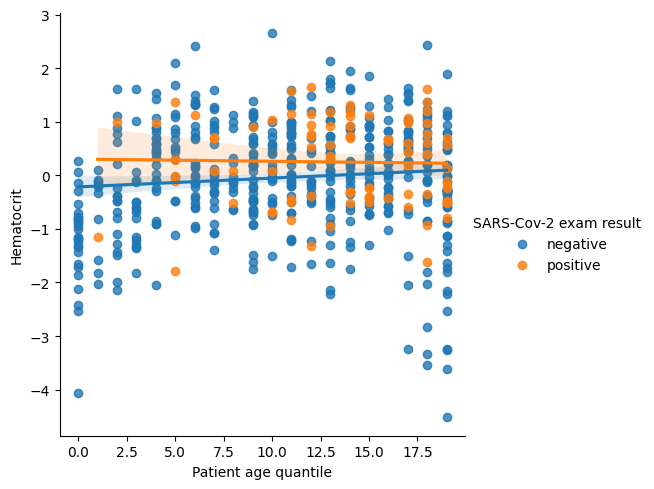

<Figure size 640x480 with 0 Axes>

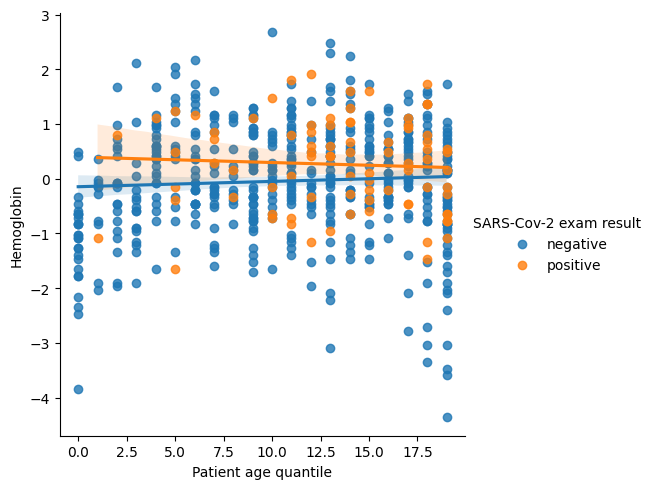

<Figure size 640x480 with 0 Axes>

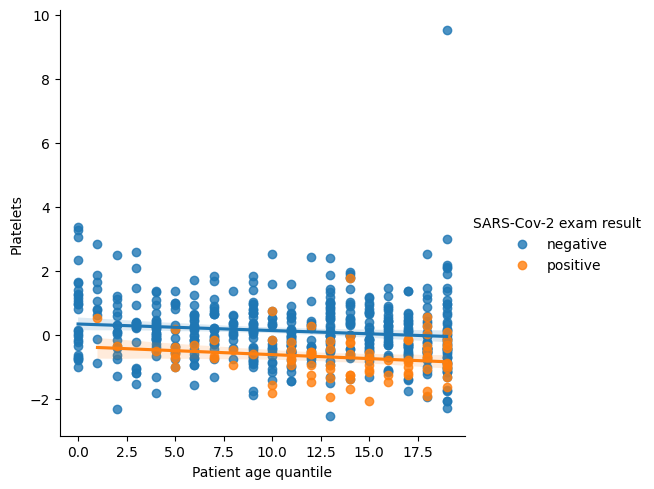

<Figure size 640x480 with 0 Axes>

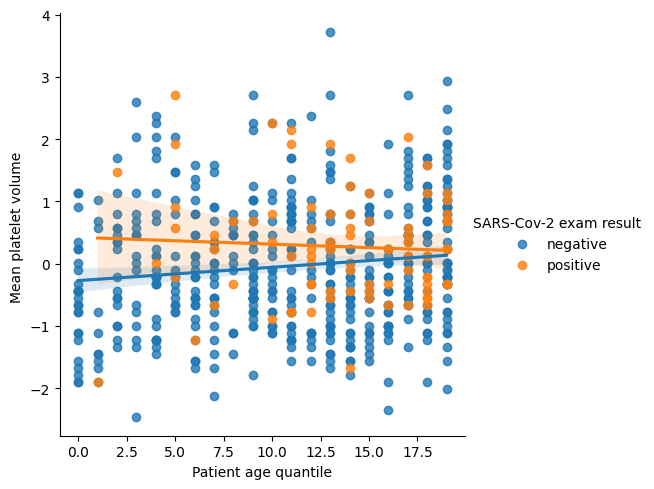

<Figure size 640x480 with 0 Axes>

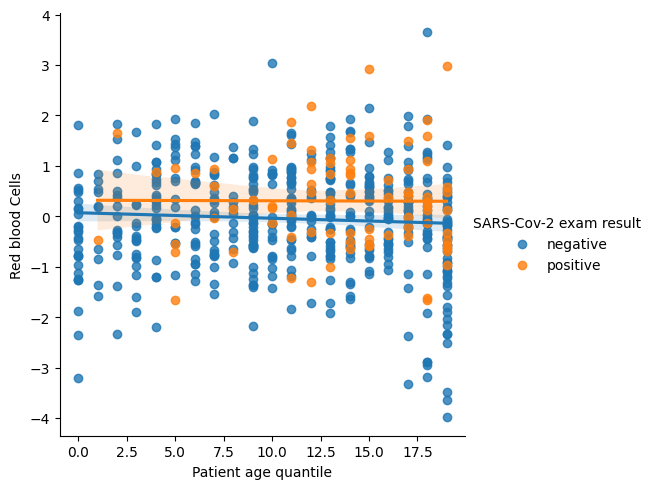

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

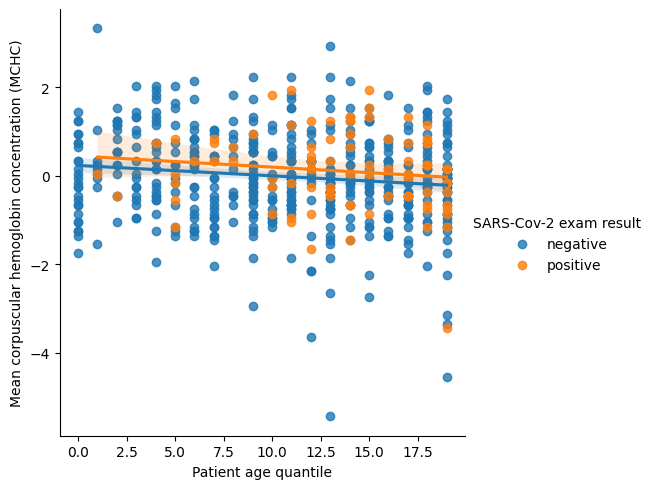

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

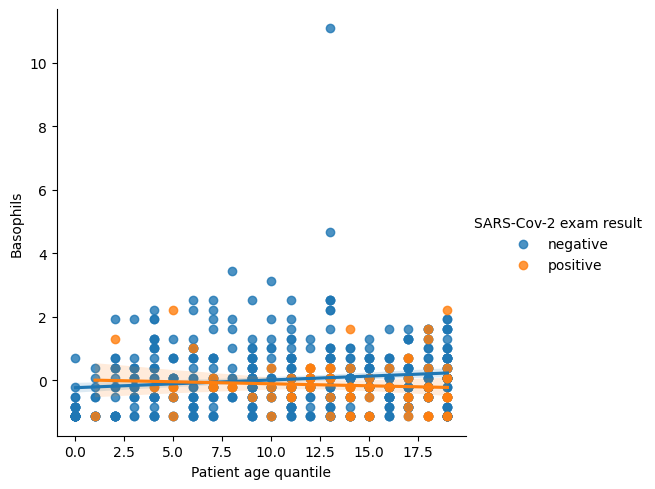

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

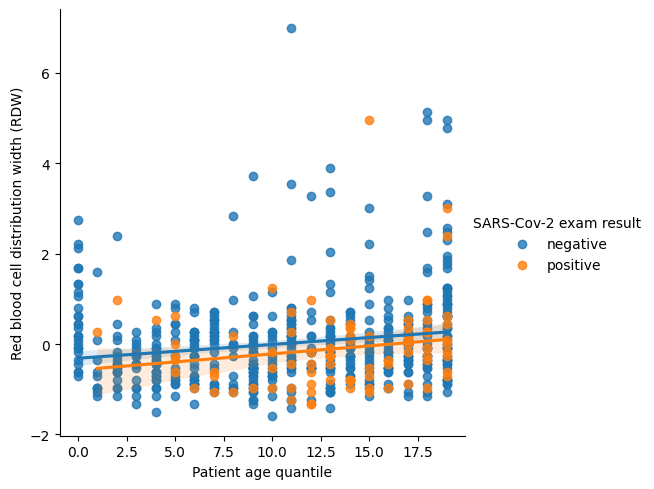

In [ ]:
#les deux droites de regressions ne sont pas supperposés les une et l'autre, c'est une bonne nouvelle.
#Certaines peuvent présenter certaines relations linéaires entre elle, mais sont plutot faibles.
for col in blood_columns:
    plt.figure()
    sns.lmplot(x='Patient age quantile', y=col, hue='SARS-Cov-2 exam result', data=df)

In [ ]:
df.corr()['Patient age quantile'].sort_values()*10
#tres faible corrélation entre age et taux sanguins. le max est  de 2%

<ipython-input-76-79d13c0711a6>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()['Patient age quantile'].sort_values()*10


Leukocytes                                               -1.663855
Platelets                                                -1.586833
Lymphocytes                                              -1.259348
Mean corpuscular hemoglobin concentration (MCHC)         -1.246715
Red blood Cells                                          -0.375102
Patient addmited to intensive care unit (1=yes, 0=no)    -0.357716
Patient addmited to semi-intensive unit (1=yes, 0=no)     0.157359
Eosinophils                                               0.220851
Patient addmited to regular ward (1=yes, 0=no)            0.461658
Monocytes                                                 0.509617
Hemoglobin                                                0.603203
Hematocrit                                                0.968085
Basophils                                                 1.075253
Mean platelet volume                                      1.194488
Red blood cell distribution width (RDW)                   1.66

##Relation entre une maladie quelconque et le taux de gobul dans le sang

In [ ]:
df['est malade'] = np.sum(df[viral_columns[:-2]] == 'detected', axis=1) >=1

<ipython-input-80-7747f91133f1>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['est malade'] = np.sum(df[viral_columns[:-2]] == 'detected', axis=1) >=1


In [ ]:
df.head()

Patient ID  Patient age quantile SARS-Cov-2 exam result  \
0  44477f75e8169d2                    13               negative   
1  126e9dd13932f68                    17               negative   
2  a46b4402a0e5696                     8               negative   
3  f7d619a94f97c45                     5               negative   
4  d9e41465789c2b5                    15               negative   

   Patient addmited to regular ward (1=yes, 0=no)  \
0                                               0   
1                                               0   
2                                               0   
3                                               0   
4                                               0   

   Patient addmited to semi-intensive unit (1=yes, 0=no)  \
0                                                  0       
1                                                  0       
2                                                  0       
3                                                  0       
4                                                  0       

   Patient addmited to intensive care unit (1=yes, 0=no)  Hematocrit  \
0                                                  0             NaN   
1                                                  0        0.236515   
2                                                  0             NaN   
3                                                  0             NaN   
4                                                  0             NaN   

   Hemoglobin  Platelets  Mean platelet volume   Red blood Cells  Lymphocytes  \
0         NaN        NaN                    NaN              NaN          NaN   
1    -0.02234  -0.517413               0.010677         0.102004     0.318366   
2         NaN        NaN                    NaN              NaN          NaN   
3         NaN        NaN                    NaN              NaN          NaN   
4         NaN        NaN                    NaN              NaN          NaN   

   Mean corpuscular hemoglobin concentration (MCHC)  Leukocytes  Basophils  \
0                                               NaN         NaN        NaN   
1                                          -0.95079    -0.09461  -0.223767   
2                                               NaN         NaN        NaN   
3                                               NaN         NaN        NaN   
4                                               NaN         NaN        NaN   

   Mean corpuscular hemoglobin (MCH)  Eosinophils  \
0                                NaN          NaN   
1                          -0.292269     1.482158   
2                                NaN          NaN   
3                                NaN          NaN   
4                                NaN          NaN   

   Mean corpuscular volume (MCV)  Monocytes  \
0                            NaN        NaN   
1                       0.166192   0.357547   
2                            NaN        NaN   
3                            NaN        NaN   
4                            NaN        NaN   

   Red blood cell distribution width (RDW) Respiratory Syncytial Virus  \
0                                      NaN                         NaN   
1                                -0.625073                not_detected   
2                                      NaN                         NaN   
3                                      NaN                         NaN   
4                                      NaN                not_detected   

    Influenza A   Influenza B Parainfluenza 1 CoronavirusNL63  \
0           NaN           NaN             NaN             NaN   
1  not_detected  not_detected    not_detected    not_detected   
2           NaN           NaN             NaN             NaN   
3           NaN           NaN             NaN             NaN   
4  not_detected  not_detected    not_detected    not_detected   

  Rhinovirus/Enterovirus Coronavirus HKU1 Parainfluenza 3  \
0                    NaN             

In [ ]:
malade_df = df[df['est malade'] == True]
non_malade_df = df[df['est malade'] == False]

<ipython-input-84-965873f27550>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(malade_df[col], label='malade')
<ipython-input-84-965873f27550>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(non_malade_df[col], label='non malade')
<ipython-input-84-965873f27550>:3: UserWarning: 

`distplot` i

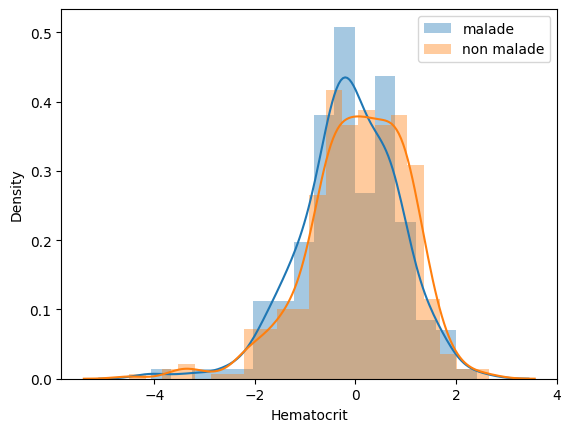

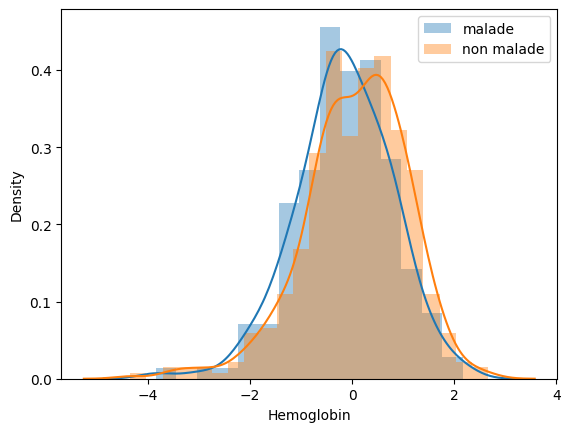

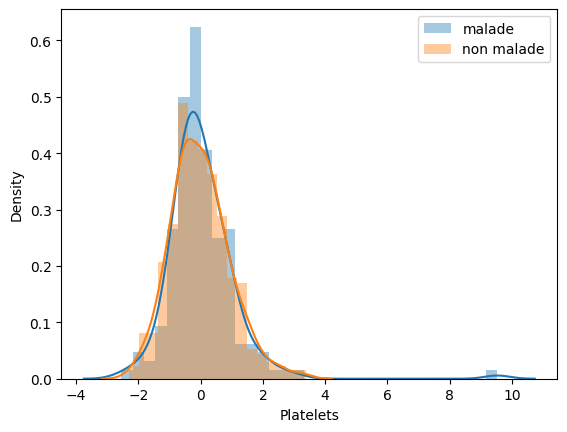

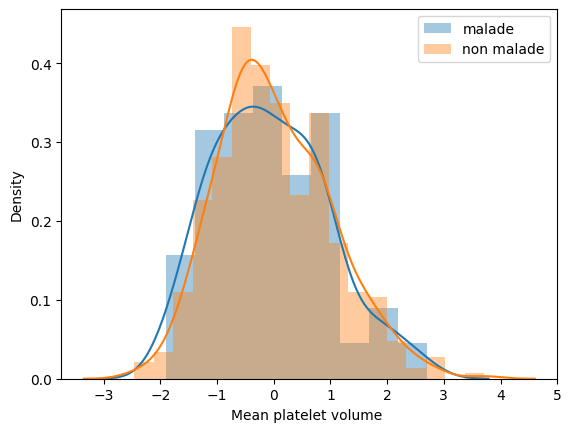

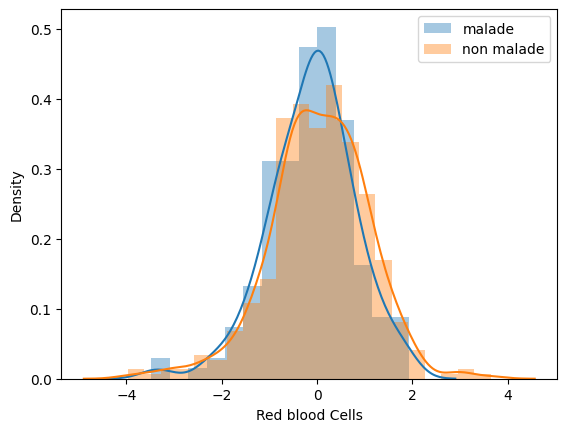

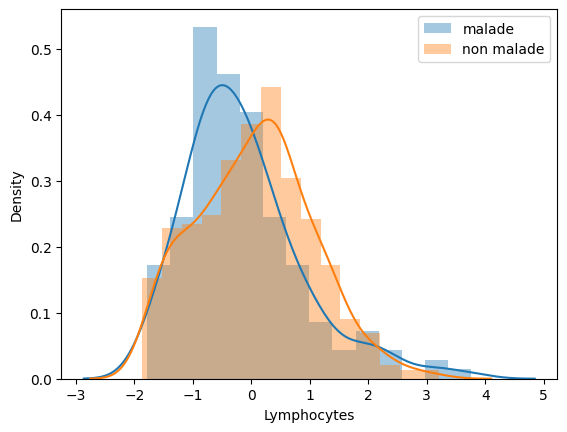

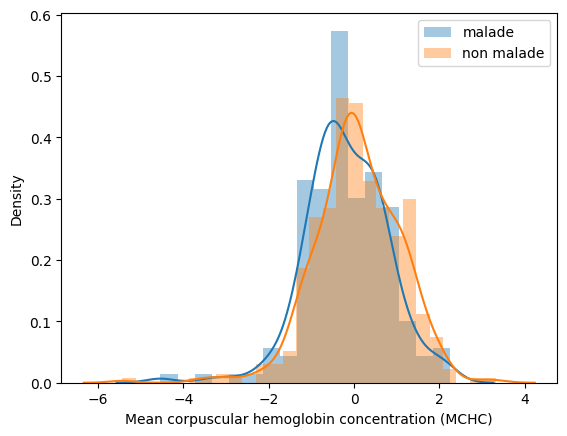

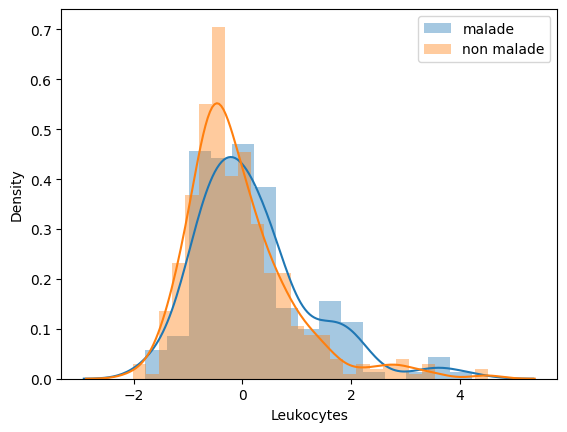

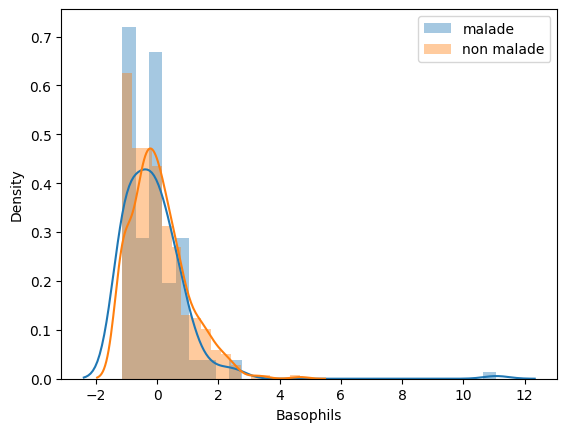

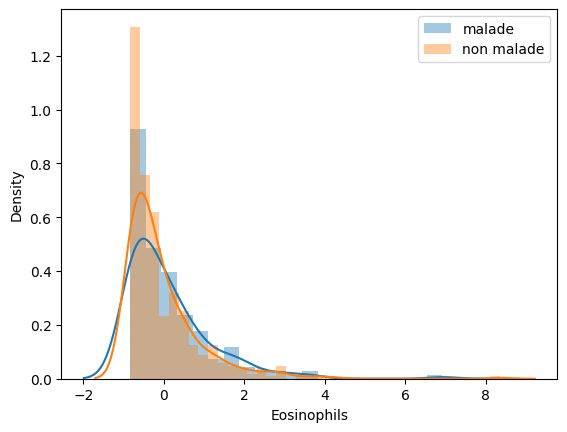

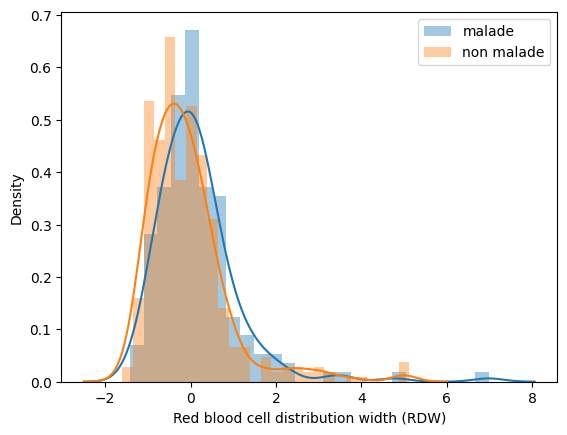

In [ ]:
for col in blood_columns:
    plt.figure()
    sns.distplot(malade_df[col], label='malade')
    sns.distplot(non_malade_df[col], label='non malade')
    plt.legend()

In [ ]:
def hospitalisation(df):
    if df['Patient addmited to regular ward (1=yes, 0=no)'] == 1:
        return 'surveillance'
    elif df['Patient addmited to semi-intensive unit (1=yes, 0=no)'] == 1:
        return 'soins semi-intensives'
    elif df['Patient addmited to intensive care unit (1=yes, 0=no)'] == 1:
        return 'soins intensifs'
    else:
        return 'inconnu'

In [ ]:

df['statut'] = df.apply(hospitalisation, axis=1)

<ipython-input-87-9fa0c925411e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['statut'] = df.apply(hospitalisation, axis=1)


Patient ID  Patient age quantile SARS-Cov-2 exam result  \
0  44477f75e8169d2                    13               negative   
1  126e9dd13932f68                    17               negative   
2  a46b4402a0e5696                     8               negative   
3  f7d619a94f97c45                     5               negative   
4  d9e41465789c2b5                    15               negative   

   Patient addmited to regular ward (1=yes, 0=no)  \
0                                               0   
1                                               0   
2                                               0   
3                                               0   
4                                               0   

   Patient addmited to semi-intensive unit (1=yes, 0=no)  \
0                                                  0       
1                                                  0       
2                                                  0       
3                                                  0       
4                                                  0       

   Patient addmited to intensive care unit (1=yes, 0=no)  Hematocrit  \
0                                                  0             NaN   
1                                                  0        0.236515   
2                                                  0             NaN   
3                                                  0             NaN   
4                                                  0             NaN   

   Hemoglobin  Platelets  Mean platelet volume   Red blood Cells  Lymphocytes  \
0         NaN        NaN                    NaN              NaN          NaN   
1    -0.02234  -0.517413               0.010677         0.102004     0.318366   
2         NaN        NaN                    NaN              NaN          NaN   
3         NaN        NaN                    NaN              NaN          NaN   
4         NaN        NaN                    NaN              NaN          NaN   

   Mean corpuscular hemoglobin concentration (MCHC)  Leukocytes  Basophils  \
0                                               NaN         NaN        NaN   
1                                          -0.95079    -0.09461  -0.223767   
2                                               NaN         NaN        NaN   
3                                               NaN         NaN        NaN   
4                                               NaN         NaN        NaN   

   Mean corpuscular hemoglobin (MCH)  Eosinophils  \
0                                NaN          NaN   
1                          -0.292269     1.482158   
2                                NaN          NaN   
3                                NaN          NaN   
4                                NaN          NaN   

   Mean corpuscular volume (MCV)  Monocytes  \
0                            NaN        NaN   
1                       0.166192   0.357547   
2                            NaN        NaN   
3                            NaN        NaN   
4                            NaN        NaN   

   Red blood cell distribution width (RDW) Respiratory Syncytial Virus  \
0                                      NaN                         NaN   
1                                -0.625073                not_detected   
2                                      NaN                         NaN   
3                                      NaN                         NaN   
4                                      NaN                not_detected   

    Influenza A   Influenza B Parainfluenza 1 CoronavirusNL63  \
0           NaN           NaN             NaN             NaN   
1  not_detected  not_detected    not_detected    not_detected   
2           NaN           NaN             NaN             NaN   
3           NaN           NaN             NaN             NaN   
4  not_detected  not_detected    not_detected    not_detected   

  Rhinovirus/Enterovirus Coronavirus HKU1 Parainfluenza 3  \
0                    NaN             

<ipython-input-89-967150afcb24>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[df['statut']==cat][col], label=cat)
<ipython-input-89-967150afcb24>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[df['statut']==cat][col], label=cat)
<ipython-input-89-967150afcb24>:4: UserWarning: 

`distp

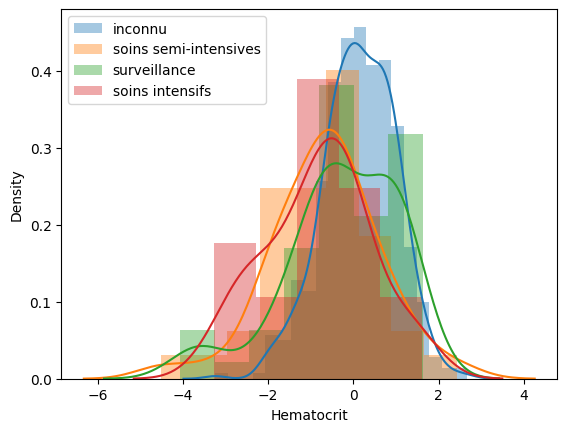

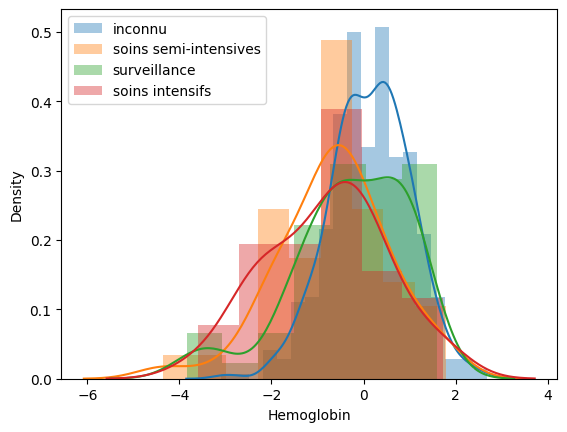

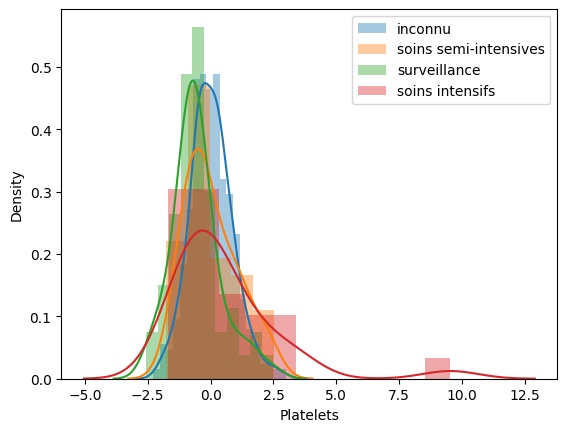

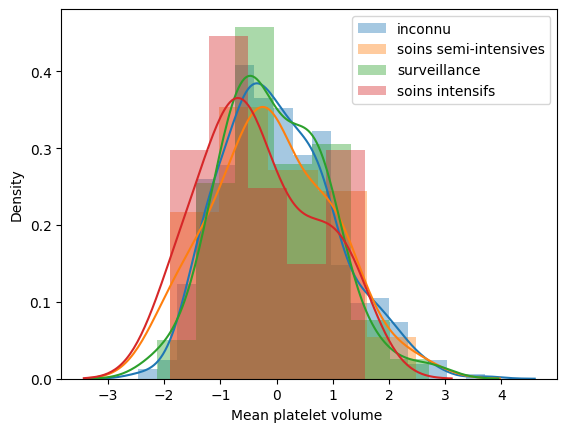

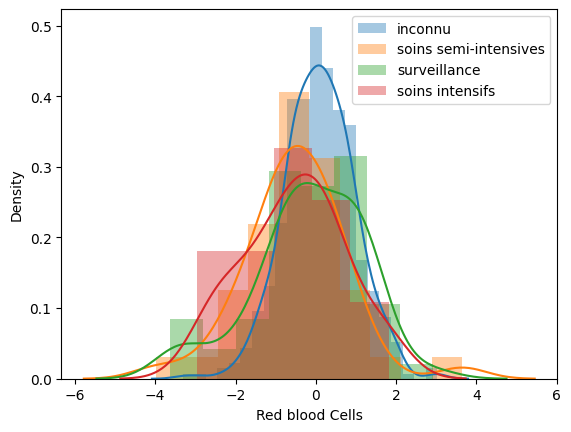

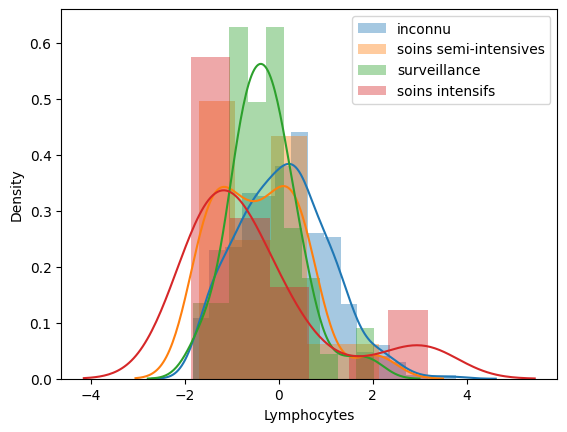

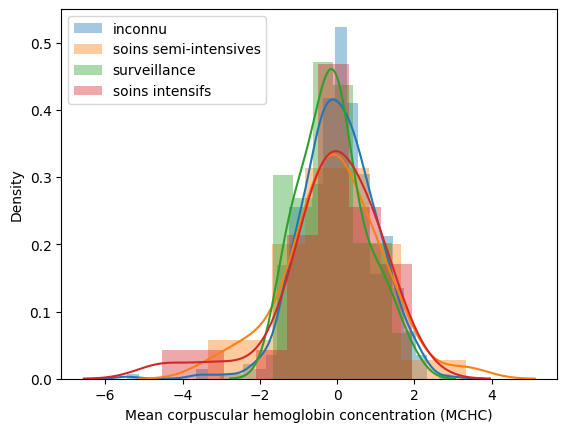

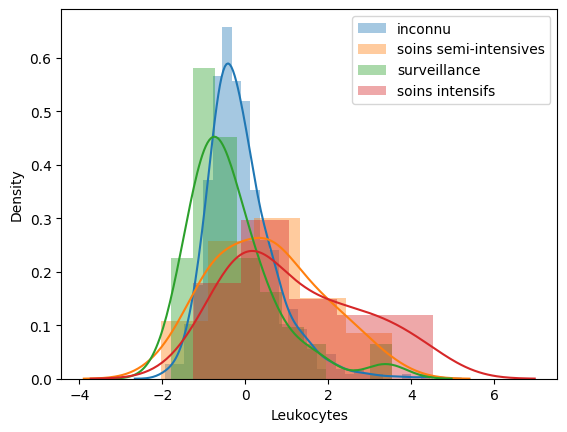

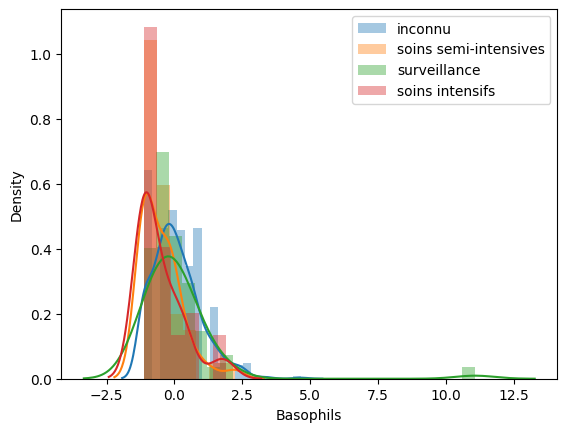

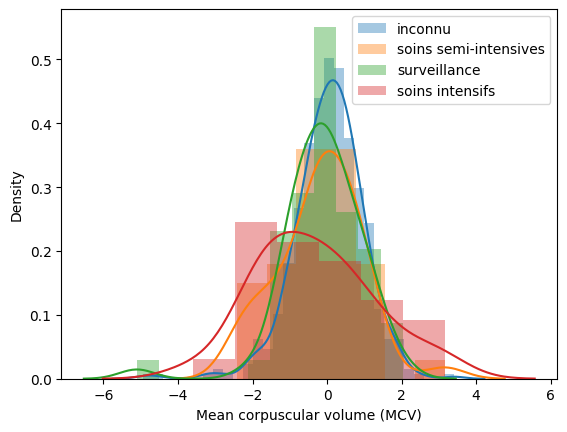

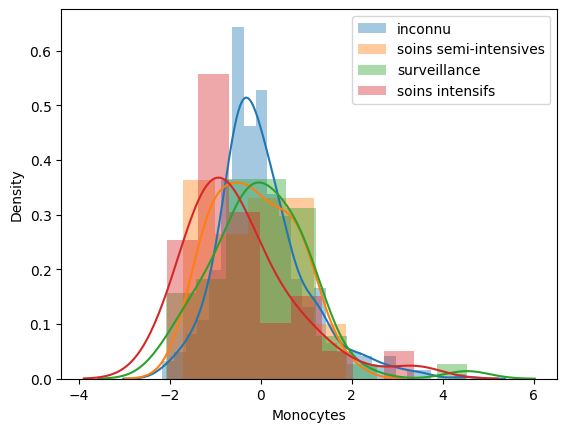

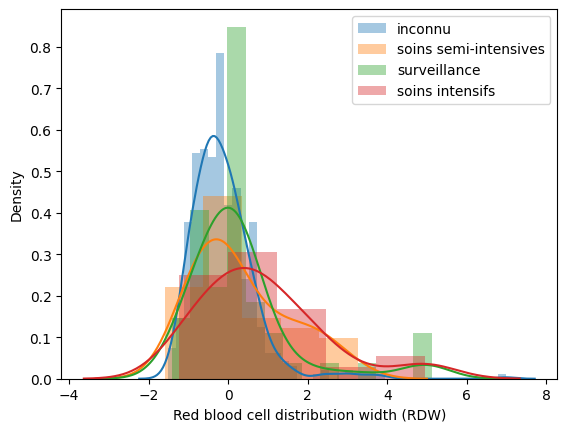

In [ ]:
#relation entre les taux sanguins dans les differents services des hopitaux(statut)
for col in blood_columns:
    plt.figure() ##on ajoute different displot sur lesquels on va iterer les differents catégories
    for cat in df['statut'].unique():
        sns.distplot(df[df['statut']==cat][col], label=cat)
    plt.legend()

In [ ]:
#impact des nan sur les varibles
blood_columns

Index(['Hematocrit', 'Hemoglobin', 'Platelets', 'Mean platelet volume ',
       'Red blood Cells', 'Lymphocytes',
       'Mean corpuscular hemoglobin concentration (MCHC)', 'Leukocytes',
       'Basophils', 'Mean corpuscular hemoglobin (MCH)', 'Eosinophils',
       'Mean corpuscular volume (MCV)', 'Monocytes',
       'Red blood cell distribution width (RDW)'],
      dtype='object')

In [ ]:
viral_columns

Index(['Respiratory Syncytial Virus', 'Influenza A', 'Influenza B',
       'Parainfluenza 1', 'CoronavirusNL63', 'Rhinovirus/Enterovirus',
       'Coronavirus HKU1', 'Parainfluenza 3', 'Chlamydophila pneumoniae',
       'Adenovirus', 'Parainfluenza 4', 'Coronavirus229E', 'CoronavirusOC43',
       'Inf A H1N1 2009', 'Bordetella pertussis', 'Metapneumovirus',
       'Parainfluenza 2', 'Influenza B, rapid test',
       'Influenza A, rapid test'],
      dtype='object')

In [ ]:
#si on supprime les nan combien, le nbre de valeurs restantes par colonnes sur les 5K
df.dropna().count()

Patient ID                                               99
Patient age quantile                                     99
SARS-Cov-2 exam result                                   99
Patient addmited to regular ward (1=yes, 0=no)           99
Patient addmited to semi-intensive unit (1=yes, 0=no)    99
Patient addmited to intensive care unit (1=yes, 0=no)    99
Hematocrit                                               99
Hemoglobin                                               99
Platelets                                                99
Mean platelet volume                                     99
Red blood Cells                                          99
Lymphocytes                                              99
Mean corpuscular hemoglobin concentration (MCHC)         99
Leukocytes                                               99
Basophils                                                99
Mean corpuscular hemoglobin (MCH)                        99
Eosinophils                             

###Test d'hypothese

In [ ]:
#test de student(permet de vérifier si la moyenne entre deux distributions est differentes)
from scipy.stats import ttest_ind

In [ ]:
positive_df.shape

(558, 39)

In [ ]:
negative_df.shape

(5086, 39)

In [ ]:
balanced_neg = negative_df.sample(positive_df.shape[0])

In [ ]:
def t_test(col):
    alpha = 0.02
    stat, p = ttest_ind(balanced_neg[col].dropna(), positive_df[col].dropna())
    if p < alpha:
        return 'H0 Rejetée'
    else :
        return 0

In [ ]:
#Ho = les taux moyens sont égaux chez les individus positifs et négatifs
for col in blood_columns:
    print(f'{col :-<50} {t_test(col)}')

Hematocrit---------------------------------------- 0
Hemoglobin---------------------------------------- 0
Platelets----------------------------------------- H0 Rejetée
Mean platelet volume ----------------------------- 0
Red blood Cells----------------------------------- H0 Rejetée
Lymphocytes--------------------------------------- 0
Mean corpuscular hemoglobin concentration (MCHC)-- 0
Leukocytes---------------------------------------- H0 Rejetée
Basophils----------------------------------------- H0 Rejetée
Mean corpuscular hemoglobin (MCH)----------------- 0
Eosinophils--------------------------------------- H0 Rejetée
Mean corpuscular volume (MCV)--------------------- 0
Monocytes----------------------------------------- H0 Rejetée
Red blood cell distribution width (RDW)----------- 0
